In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [5]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


# Data Description

* var1 - var19: a feature for the data.
* target: variable we wish to be able to predict, which is 1 of 3 classes.
# Question 1

- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use X_train).
- Remember to scale the data first.
- What number of components would you recommend based on your analysis?
- Explain your results using markdown cells.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

In [7]:
pca = PCA()
pca.fit(X_train_scale)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[1.78248763e-01 1.31423463e-01 1.03428992e-01 8.93001375e-02
 7.00271587e-02 6.26207004e-02 5.53463463e-02 5.16479599e-02
 4.98606225e-02 4.86667259e-02 4.67744196e-02 4.42653499e-02
 4.16638974e-02 2.67254645e-02 1.92266064e-32 1.86951619e-32
 4.71809418e-33 2.77871545e-33 2.48070965e-33 1.47320276e-33]


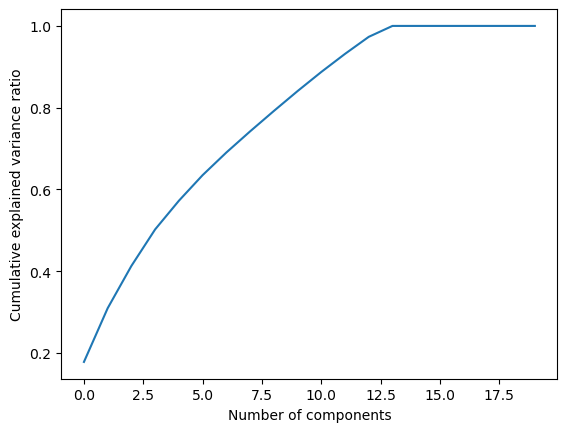

In [8]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

- Based on the provided graph, I suggest incorporating a total of 13 components into the system.

# Question 2

- Evaluate the target variable in the df object.
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell.

In [9]:
Evaluation = df['target'].value_counts(normalize=True)
print(Evaluation)

0.0    0.496000
2.0    0.253333
1.0    0.250667
Name: target, dtype: float64


- In cases where the target variable is approximately balanced, accuracy can be a suitable performance metric for evaluating the prediction model. Accuracy measures the percentage of instances in the test set that are correctly classified, making it a straightforward and logical metric to assess the model's performance.

# Question 3

- Without using PCA, create a logistic regression model using practices discussed in class.
- Which model would you choose? Explain your results in the markdown cells.
- What is the accuracy, precision, and recall for the test data?

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

model = LogisticRegression(random_state=40)
model.fit(X_train_scale, y_training)

y_pred = model.predict(X_test_scale)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7033333333333334
Precision: 0.6855872622001655
Recall: 0.681410661265617


- We got an accuracy of 70 percent for this model

# Question 4

- Use PCA within a pipeline to create a logistic regression model using best practices from class.
- Which model performs the best on the training data? Explain your results in markdown cells.
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

pipeline = Pipeline([('pca', PCA(n_components=10, random_state=40)),('logreg', LogisticRegression(random_state=40))])

pipeline.fit(X_train_scale, y_training)

y_pred = pipeline.predict(X_test_scale)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.69
Precision: 0.6708589105614277
Recall: 0.6610050824394097


In [21]:
model = LogisticRegression(random_state=40)
model.fit(X_train_scale, y_training)
y_pred_lr = model.predict(X_train_scale)
accuracy_lr = accuracy_score(y_training, y_pred_lr)

pipeline.fit(X_train_scale, y_training)
y_pred_pca = pipeline.predict(X_train_scale)
accuracy_pca = accuracy_score(y_training, y_pred_pca)

print("Logistic Regression accuracy (training):", accuracy_lr)
print("PCA + Logistic Regression accuracy (training):", accuracy_pca)

Logistic Regression accuracy (training): 0.725
PCA + Logistic Regression accuracy (training): 0.7225


In [22]:
print("Logistic Regression accuracy (test):", accuracy_lr)
print("PCA + Logistic Regression accuracy (test):", accuracy)

Logistic Regression accuracy (test): 0.725
PCA + Logistic Regression accuracy (test): 0.69


- Although both models showed similar accuracy on the training data, the original logistic regression model outperformed the other model on the test data. This suggests that the original logistic regression model generalizes better to unseen data and is more robust in its predictions compared to the other model.

# Question 5
- Without using PCA, create a decision tree model using best practices discussed in class.
- Which model performs the best on the training data? Explain your results in the markdown cells.
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than either of the logistic regression models?

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier()

params = {'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, params, cv=5)
dt_grid.fit(X_train_scale, y_training)

print("Best hyperparameters:", dt_grid.best_params_)

y_pred = dt_grid.predict(X_test_scale)

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Best hyperparameters: {'max_depth': 6, 'min_samples_split': 2}
Accuracy: 0.7166666666666667
Precision: 0.7148878073223425
Recall: 0.7166666666666667


- The accuracy of this model is better than the accuracy of both the logistic regression models

# Question 6

- Repeat Question 5 but use PCA.
- Does this perform better than the original Decision Tree or the logistic regression models?

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca_dt_pipeline = Pipeline([('pca', PCA()),('dt', DecisionTreeClassifier())])

params = {'pca__n_components': [2, 5, 10],'dt__max_depth': [2, 4, 6],'dt__min_samples_split': [2, 5, 10]}

pca_dt_grid = GridSearchCV(pca_dt_pipeline, params, cv=5)
pca_dt_grid.fit(X_train_scale, y_training)

print("Best hyperparameters:", pca_dt_grid.best_params_)

y_pred = pca_dt_grid.predict(X_test_scale)

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Best hyperparameters: {'dt__max_depth': 6, 'dt__min_samples_split': 10, 'pca__n_components': 5}
Accuracy: 0.67
Precision: 0.662933451417004
Recall: 0.67


The accuracy of this model is lesser than all the previous models